# TensorFlow NN
- Sequential
- Functional
- Flow: Make the model, Complie, Fit, Predict, Evaluate, Visualization of loss and acc

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
X,y = make_circles(1000,noise = 0.03)

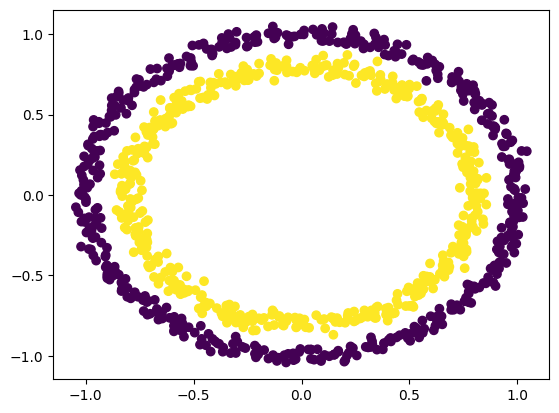

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,y,train_size=0.8)
print(x_train.shape,x_test.shape)

(800, 2) (200, 2)


In [7]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [6]:
# y_train = tf.one_hot(y_train,depth=2)
# y_test = tf.one_hot(y_test,depth=2)
# print(y_train.shape,y_test.shape)

In [18]:
# model = keras.Sequential([
#     keras.layers.Input(shape=(2,)),
#     keras.layers.Dense(5,activation='relu'),
#     keras.layers.Dense(3,activation='relu'),
#     keras.layers.Dense(1,activation='sigmoid')])

# print(model.summary())


model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model.summary())

model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5038 - loss: 0.7040 - val_accuracy: 0.5350 - val_loss: 0.6978
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4693 - loss: 0.7025 - val_accuracy: 0.5400 - val_loss: 0.6951
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5036 - loss: 0.6959 - val_accuracy: 0.5200 - val_loss: 0.6937
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4877 - loss: 0.6949 - val_accuracy: 0.4900 - val_loss: 0.6933
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4843 - loss: 0.6941 - val_accuracy: 0.4750 - val_loss: 0.6927
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4522 - loss: 0.6949 - val_accuracy: 0.4900 - val_loss: 0.6922
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5064 - loss: 0.6916 - val_accuracy: 0.4700 - val_loss: 0.6916
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4877 - loss: 0.6907 - val_accuracy: 0.51

In [19]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0154 


[0.013645101338624954, 1.0]

In [20]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [21]:
ypred

array([[9.9865896e-01],
       [1.3431465e-03],
       [9.9888849e-01],
       [8.2384273e-02],
       [9.9783128e-01],
       [9.9830431e-01],
       [5.0447438e-02],
       [9.9943119e-01],
       [1.0799224e-02],
       [8.4251342e-03],
       [1.6563640e-03],
       [2.1896095e-03],
       [9.9653369e-01],
       [9.9599922e-01],
       [2.4148415e-01],
       [9.9786305e-01],
       [9.3623456e-03],
       [7.2303484e-04],
       [9.7723484e-01],
       [1.0868317e-03],
       [1.5111093e-02],
       [9.9849319e-01],
       [3.0461751e-02],
       [9.9072844e-01],
       [3.2055940e-02],
       [4.6176147e-03],
       [4.2170091e-03],
       [9.9827176e-01],
       [9.9997252e-01],
       [4.5886566e-04],
       [9.9922115e-01],
       [7.4751242e-03],
       [1.3498764e-03],
       [5.8133174e-03],
       [6.2601612e-04],
       [6.0499045e-03],
       [9.9523348e-01],
       [9.9697983e-01],
       [9.8661554e-01],
       [9.6619463e-01],
       [9.9688882e-01],
       [1.372147

In [22]:
# np.argmax(ypred,axis = 1)
# ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
doing binary classifcation...


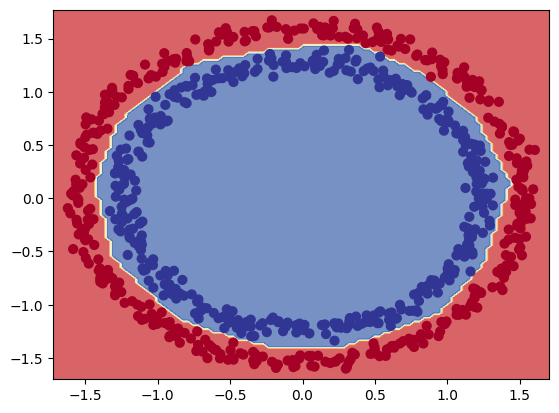

In [23]:
# plot_decision_boundary(model,x_train,np.argmax(y_train,axis=1))
plot_decision_boundary(model,x_train,y_train)

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

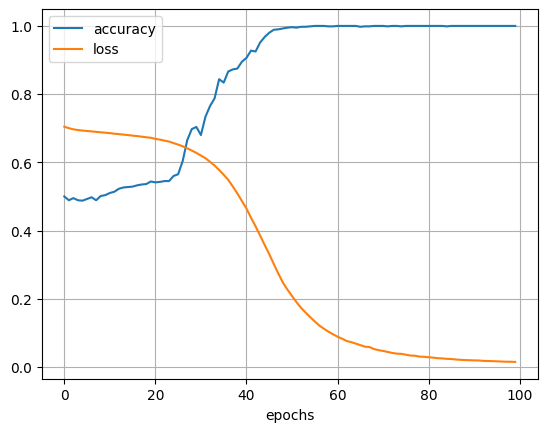

In [25]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['loss'],label = 'loss')

plt.legend()
plt.xlabel('epochs')
plt.grid()
plt.show()

In [26]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0154 


[0.013645101338624954, 1.0]

In [27]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4998 - loss: 0.7533 - val_accuracy: 0.4850 - val_loss: 0.7407
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5011 - loss: 0.7374 - val_accuracy: 0.5050 - val_loss: 0.7274
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5170 - loss: 0.7334 - val_accuracy: 0.5200 - val_loss: 0.7167
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5137 - loss: 0.7189 - val_accuracy: 0.5400 - val_loss: 0.7085
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5217 - loss: 0.7174 - val_accuracy: 0.5500 - val_loss: 0.7025
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5583 - loss: 0.6949 - val_accuracy: 0.5500 - val_loss: 0.6977
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5400 - loss: 0.6895 - val_accuracy: 0.5250 - val_loss: 0.6941
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5238 - loss: 0.6881 - val_accuracy: 0.52

In [28]:
y_train = tf.one_hot(y_train,depth=2)
y_test = tf.one_hot(y_test,depth=2)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)


In [29]:
print(y_test)

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]

In [30]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5147 - loss: 0.7913 - val_accuracy: 0.4850 - val_loss: 0.7741
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5106 - loss: 0.7786 - val_accuracy: 0.4850 - val_loss: 0.7475
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4993 - loss: 0.7462 - val_accuracy: 0.4850 - val_loss: 0.7275
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5070 - loss: 0.7167 - val_accuracy: 0.4850 - val_loss: 0.7120
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4964 - loss: 0.7143 - val_accuracy: 0.4850 - val_loss: 0.6998
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5264 - loss: 0.6850 - val_accuracy: 0.4850 - val_loss: 0.6912
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5285 - loss: 0.6834 - val_accuracy: 0.4850 - val_loss: 0.6846
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5173 - loss: 0.6759 - val_accuracy: 0.48

In [34]:
Input = keras.Input(shape=(2,))
x = layers.Dense(10,activation='relu')(Input)
x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(10,activation='relu')(x)
output = layers.Dense(2,activation='softmax')(x)

model = keras.Model(inputs = Input, outputs = output)

print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5128 - loss: 0.6843 - val_accuracy: 0.4850 - val_loss: 0.6899
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4967 - loss: 0.6865 - val_accuracy: 0.5200 - val_loss: 0.6874
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5332 - loss: 0.6830 - val_accuracy: 0.5450 - val_loss: 0.6858
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5478 - loss: 0.6778 - val_accuracy: 0.5300 - val_loss: 0.6843
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.6786 - val_accuracy: 0.5200 - val_loss: 0.6824
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5316 - loss: 0.6776 - val_accuracy: 0.5250 - val_loss: 0.6810
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5193 - loss: 0.6766 - val_accuracy: 0.5250 - val_loss: 0.6790
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5198 - loss: 0.6752 - val_accuracy: 0.53

In [35]:
model.inputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_48>]

In [37]:
model.outputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_52>]

In [38]:
model.layers

[<InputLayer name=input_layer_8, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>]

In [39]:
model.layers[-2].output

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_51>

In [40]:
# new_model = keras.Model(inputs = model.inputs,
#                         outputs = model.get_layer('dense_6').output)
new_model = keras.Model(inputs = model.inputs,
                        outputs = [model.layers[-2].output,model.layers[-1].output])
print(new_model.summary())

features = new_model.predict(x_test)
# for feat in features:
#     print(feat.shape)

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_48']
Received: inputs=Tensor(shape=(32, 2))
  warnings.warn(msg)
C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_48']
Received: inputs=Tensor(shape=(None, 2))
  warnings.warn(msg)


In [43]:
len(features)

2

In [44]:
features[0].shape

(200, 10)

In [45]:
features[1].shape

(200, 2)

In [46]:
features

[array([[0.1084047 , 0.1202088 , 0.6601776 , ..., 0.30531263, 0.24309269,
         0.92371476],
        [1.3819103 , 1.0794883 , 0.        , ..., 1.0517819 , 1.0188475 ,
         0.        ],
        [0.04249457, 0.12526506, 1.051019  , ..., 0.01554471, 0.        ,
         0.93836355],
        ...,
        [1.0846123 , 1.0502658 , 0.25782287, ..., 0.9178534 , 0.7399702 ,
         0.        ],
        [0.1856572 , 0.20185167, 0.75781465, ..., 0.38213974, 0.        ,
         0.932971  ],
        [0.18033114, 0.        , 0.9565158 , ..., 0.        , 0.        ,
         0.9930115 ]], dtype=float32),
 array([[1.23252636e-02, 9.87674713e-01],
        [9.99833107e-01, 1.66830054e-04],
        [1.61251242e-04, 9.99838710e-01],
        [9.34481025e-01, 6.55190423e-02],
        [9.10988660e-04, 9.99089003e-01],
        [1.03618968e-02, 9.89638090e-01],
        [9.81874108e-01, 1.81259345e-02],
        [1.78331463e-03, 9.98216689e-01],
        [9.73551452e-01, 2.64486093e-02],
        [9.95633